### Brute force optimization

We realize that $x_i$ corresponds to a maximum point if $y_{i-1} < y_{i} > y_{i+1}$. Similarly, $x_i$ corresponds to a minimum if $y_{i-1} > y_{i} < y_{i+1}$. We can do  this test for all "inner" points $i = 1, \ldots, n-1$ to find all local mimima and maxima. In addition, we need to add an end point, $i = 0$ or $i = n$, if the corresponding $y_{i}$ is a global maximum or minimum.

[0.    0.004 0.008 ... 3.992 3.996 4.   ]
Minima: [(0.7000000000000001, -0.5772302750838405), (2.152, -0.006670480742256502), (3.66, -7.333826733936654e-07)]
Maxima: [(0.0, 1.0), (1.416, 0.10965467991643564), (2.9, 0.00012651823896373234)]


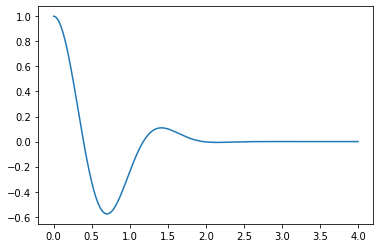

In [25]:
import numpy as np

def brute_force_optimizer(f, a, b, n):
    x = np.linspace(a, b, n)
   # print (x)
    y = f(x)
    # Let maxima and minima hold the indices corresponding
    # to (local) maxima and minima points
    minima = []
    maxima = []
    for i in range(n-1):
        if y[i-1] < y[i] > y[i+1]:    # Except end point, y[-1] < y[0] > y[1] and y[n-3] < y[n-2] > y[n-1]
            maxima.append(i)
        if y[i-1] > y[i] < y[i+1]:
            minima.append(i)
            
    # What about the end points
    y_max_inner = max([y[i] for i in maxima])
    y_min_inner = min([y[i] for i in minima])
    if y[0] > y_max_inner:    # y[0] is maximum
        maxima.append(0)
    if y[len(x)-1] > y_max_inner: # y[n-1] as last index is maximum
        maxima.append(len(x)-1)
    if y[0] < y_min_inner:
        minima.append(0)
    if y[len(x)-1] < y_min_inner:
        minima.append(len(x)-1)
        
    # Return x and y values
    return [(x[i], y[i]) for i in minima], \
           [(x[i], y[i]) for i in maxima]
import matplotlib.pyplot as plt

def demo():
    minima, maxima = brute_force_optimizer(
        lambda x: np.exp(-x**2)*np.cos(4*x), 0, 4, 1001)
    x1 = np.linspace(0, 4, 100001) # 1001, 10001, 100001
    y = np.exp(-x1**2)*np.cos(4*x1)
    fig,ax = plt.subplots()
    ax.plot(x1,y)
    print('Minima:', minima)
    print('Maxima:', maxima)
    
if __name__ == '__main__':
    demo()

### Brute force optimization using SciPy

In [29]:
import numpy as np
from scipy import optimize
import math

params = (1, 4, 0)
def f1(z, *params):
    x, y = z
    a, b, c = params
    return (a * math.exp(-x**2)*math.cos(b*x)+c*y)

rranges = (slice(0, 4, 0.004), slice(0, 4, 0.004))
resbrute = optimize.brute(f1, rranges, args=params, full_output=True, finish=optimize.fmin)


print ("Minima: (%f ,%f)" %(resbrute[0][0], resbrute[1]))


Minima: (0.701106 ,-0.577237)
